### California's COVID rate is now twice that of Florida's despite mask mandates

https://www.foxnews.com/us/masked-california-covid-rate-twice-florida?utm_id=41721&sfmc_id=3444094

COVID data: https://dev.socrata.com/foundry/data.cdc.gov/9mfq-cb36

Population data: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage

In [18]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt

In [2]:
client = Socrata("data.cdc.gov", None)

In [10]:
df_fl = client.get("9mfq-cb36", state="FL")
len(df_fl)

658

In [9]:
df_ca = client.get("9mfq-cb36", state="CA")
len(df_ca)

658

In [60]:
dff = pd.DataFrame.from_records(df_fl).sort_values("submission_date")
dff

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
628,2020-01-22T00:00:00.000,FL,0,0,NaN,0,0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
452,2020-01-23T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
88,2020-01-24T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
212,2020-01-25T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
308,2020-01-26T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...
124,2021-11-05T00:00:00.000,FL,3659390,1692.0,571,60418,3.0,0,2021-11-05T00:00:00.000,Not agree,Not agree
458,2021-11-06T00:00:00.000,FL,3660913,1523.0,298,60418,0.0,0,2021-11-06T00:00:00.000,Not agree,Not agree
533,2021-11-07T00:00:00.000,FL,3661182,269.0,86,60418,0.0,0,2021-11-08T15:35:12.187,Not agree,Not agree
570,2021-11-08T00:00:00.000,FL,3662957,1775.0,500,60418,0.0,0,2021-11-09T15:49:35.085,Not agree,Not agree


In [77]:
select_cols = ["submission_date", "state", "tot_cases", "new_case", "tot_death","new_death"]
number_cols = ["tot_cases", "new_case", "tot_death","new_death"]

In [79]:
dfc = pd.DataFrame.from_records(df_ca).sort_values("submission_date")
dfc

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
485,2020-01-22T00:00:00.000,CA,0,0.0,0,0,0,0,NaN,NaN,0,0,2020-01-24T00:00:00.000,Agree,Not agree
152,2020-01-23T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-25T00:00:00.000,Agree,Not agree
651,2020-01-24T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-26T00:00:00.000,Agree,Not agree
597,2020-01-25T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-27T00:00:00.000,Agree,Not agree
73,2020-01-26T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-28T00:00:00.000,Agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,2021-11-05T00:00:00.000,CA,4937188,4688285.0,248903,8012.0,0,71852,NaN,NaN,93.0,0,2021-11-06T13:17:26.097,Agree,Not agree
540,2021-11-06T00:00:00.000,CA,4937188,4688285.0,248903,0.0,0,71852,NaN,NaN,0.0,0,2021-11-08T13:55:23.618,Agree,Not agree
612,2021-11-07T00:00:00.000,CA,4937188,4688285.0,248903,0.0,0,71852,NaN,NaN,0.0,0,2021-11-08T15:35:12.187,Agree,Not agree
237,2021-11-08T00:00:00.000,CA,4956081,4707178.0,248903,18893.0,0,71979,NaN,NaN,127.0,0,2021-11-09T15:49:35.085,Agree,Not agree


In [78]:
def prepare_df(df):
    df = df.loc[:, select_cols]
    df.loc[:,"submission_date"] = pd.to_datetime(df.loc[:,"submission_date"])
    df.loc[:,number_cols] = df[number_cols].astype(float).astype(int)
    return df

In [80]:
dff = prepare_df(dff)
dff.dtypes

submission_date    datetime64[ns]
state                      object
tot_cases                   int64
new_case                    int64
tot_death                   int64
new_death                   int64
dtype: object

In [81]:
dfc = prepare_df(dfc)
dfc.dtypes

submission_date    datetime64[ns]
state                      object
tot_cases                   int64
new_case                    int64
tot_death                   int64
new_death                   int64
dtype: object

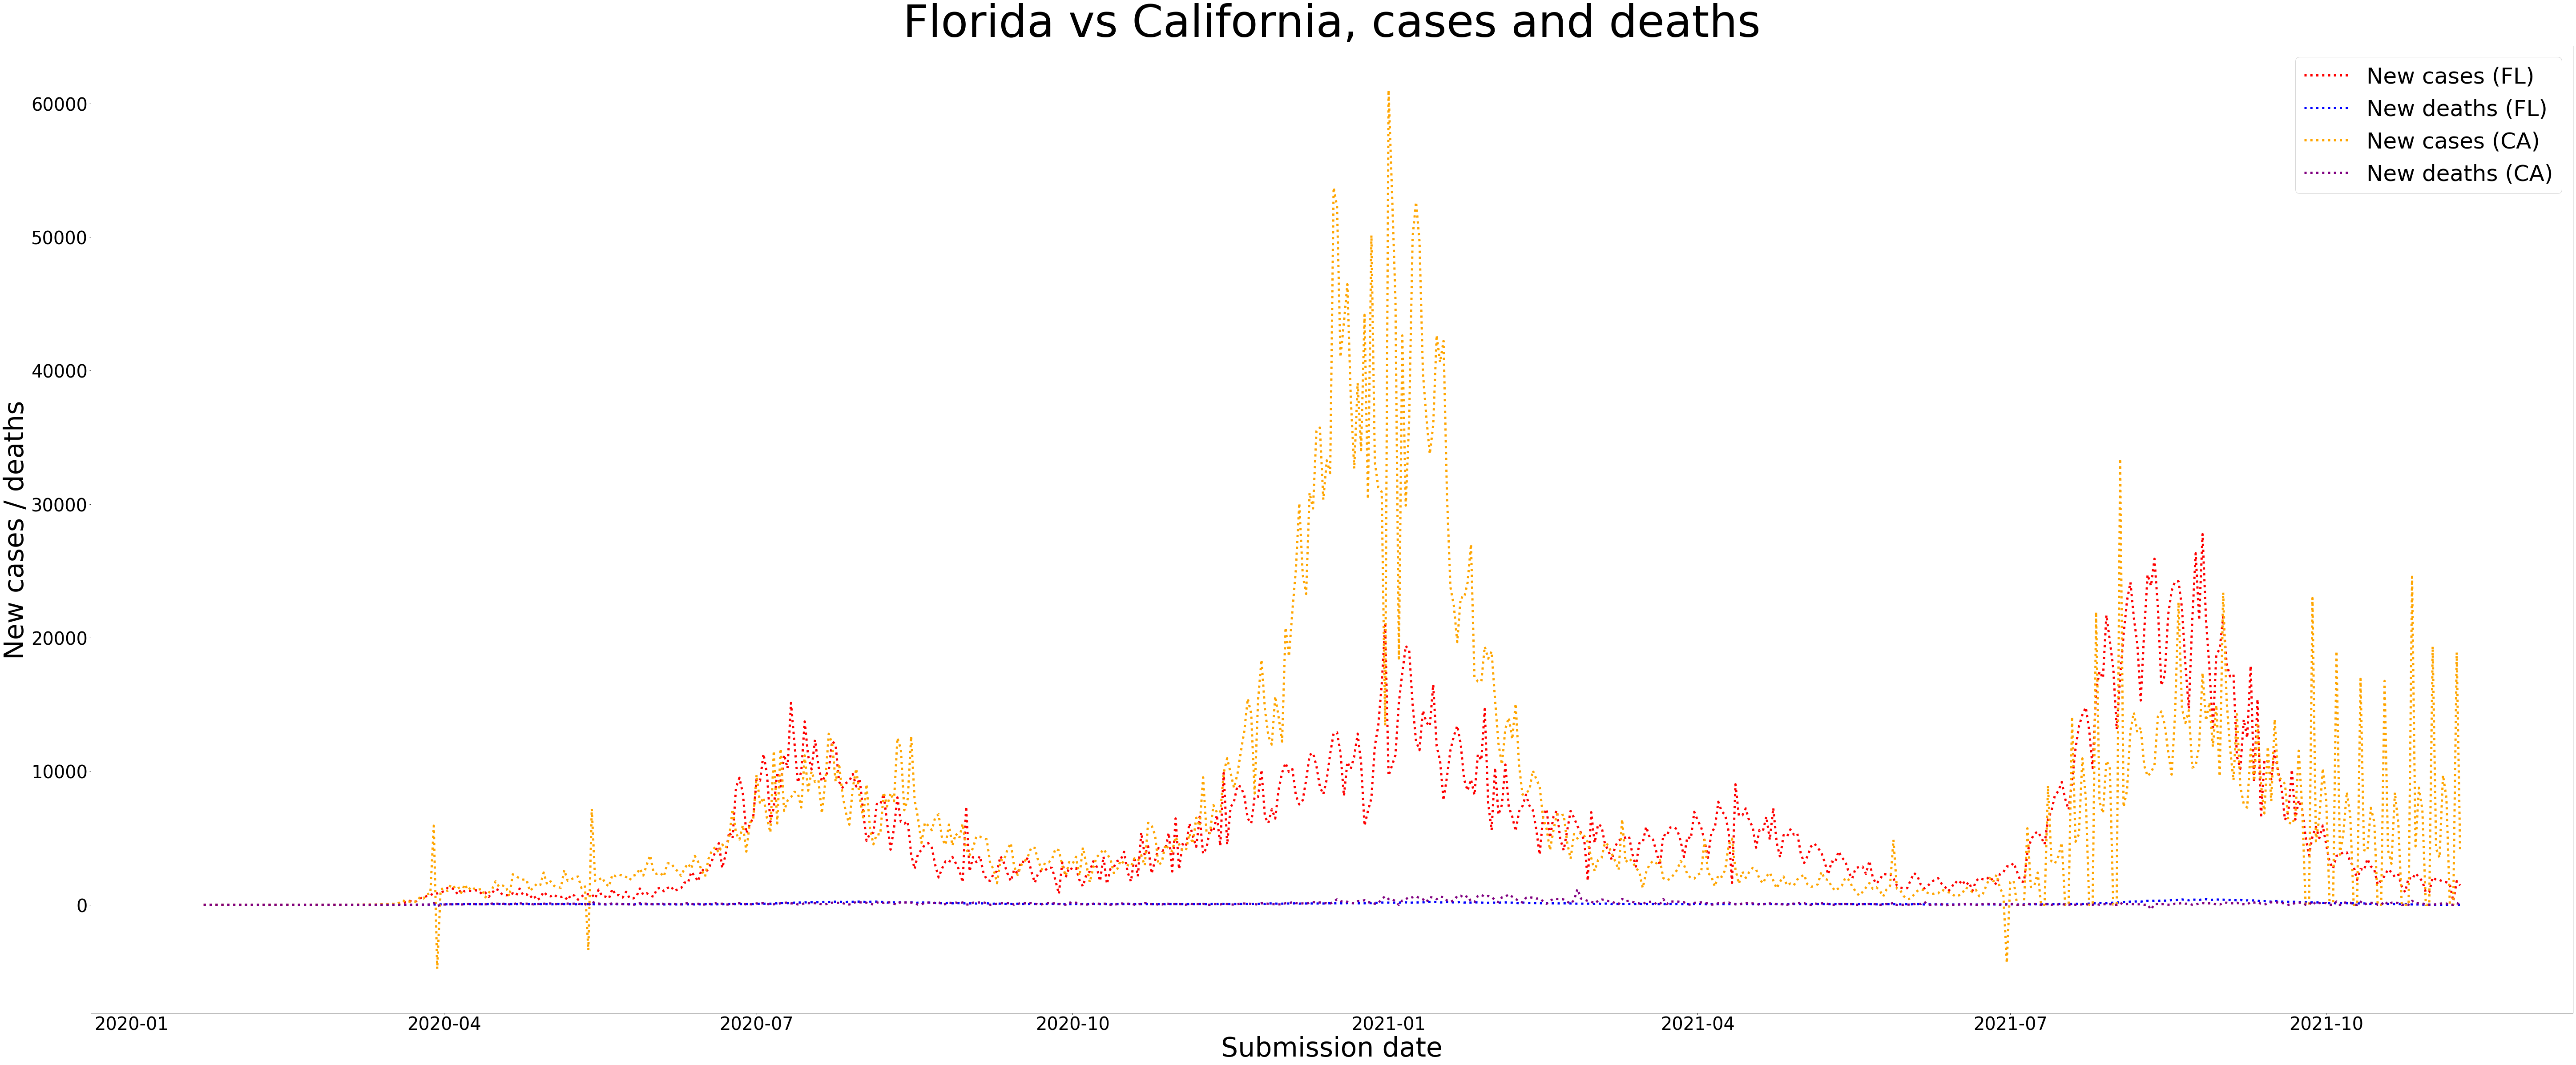

In [94]:
plt.figure(figsize=(100,40))
plt.plot(dff["submission_date"], dff["new_case"], label = "New cases (FL)", color='red', linewidth=5, linestyle=":")
plt.plot(dff["submission_date"], dff["new_death"], label = "New deaths (FL)", color='blue', linewidth=5, linestyle=":")
plt.plot(dfc["submission_date"], dfc["new_case"], label = "New cases (CA)", color='orange', linewidth=5, linestyle=":")
plt.plot(dfc["submission_date"], dfc["new_death"], label = "New deaths (CA)", color='purple', linewidth=5, linestyle=":")
plt.xlabel('Submission date', fontsize=60)
plt.ylabel('New cases / deaths', fontsize=60)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Florida vs California, cases and deaths', fontsize=100)
plt.legend(fontsize=50)
plt.show()

In [ ]:
dfp = pd.read_csv("nst-est2019-alldata.csv", )